In [2]:
import os
import soundfile as sf
import madmom
import sklearn
import IPython
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from madmom.audio.filters import LogarithmicFilterbank

from mir_eval.onset import f_measure

In [74]:
# CNN

num_thresholds = 100
ground_truth = (np.load('../../data/interim/Onsets_TrainVal_44K.npy')-1024)/44100
window_lengths = [0.03]
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
f1_scores = np.zeros((len(thresholds),len(window_lengths)))
detector = madmom.features.onsets.CNNOnsetProcessor()
activation_function = detector('../../data/interim/Audio_TrainVal_44K.wav')
for a in range(len(thresholds)):
    threshold = thresholds[a]
    pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,threshold=threshold)
    onset_predictions = pick_picker(activation_function)
    for b in range(len(window_lengths)):
        window_length = window_lengths[b]
        f1_scores[a,b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
    print(str(a) + ' of ' + str(len(thresholds)) + ' - ' + str(f1_scores[a]))
np.save('../../results/f1_scores_cnn_val', f1_scores)

max_f1 = 0
idx_max = 0
for c in range(len(thresholds)):
    if np.mean(f1_scores[c])>max_f1:
        idx_max = c
        max_f1 = np.mean(f1_scores[c])
        scores_max = f1_scores[c]
print(scores_max)

ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100
window_lengths = [0.03]
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
threshold = thresholds[idx_max]
f1_scores = np.zeros(len(window_lengths))

pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,threshold=threshold)
detector = madmom.features.onsets.CNNOnsetProcessor()
activation_function = detector('../../data/interim/Audio_Test_44K.wav')
onset_predictions = pick_picker(activation_function)

ind_delete = [i+1 for (x,y,i) in zip(onset_predictions,onset_predictions[1:],range(len(onset_predictions))) if 0.015>abs(x-y)]
onset_predictions = np.delete(onset_predictions, ind_delete)

for b in range(len(window_lengths)):
    window_length = window_lengths[b]
    f1_scores[b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
print('Test: ' + str(f1_scores))
np.save('../../results/f1_scores_cnn_test', f1_scores)

0 of 100 - [0.49912091]
1 of 100 - [0.55291282]
2 of 100 - [0.58725195]
3 of 100 - [0.61116087]
4 of 100 - [0.63079475]
5 of 100 - [0.64608643]
6 of 100 - [0.65913453]
7 of 100 - [0.67019904]
8 of 100 - [0.68011657]
9 of 100 - [0.68869869]
10 of 100 - [0.69711921]
11 of 100 - [0.70429281]
12 of 100 - [0.71041524]
13 of 100 - [0.71646192]
14 of 100 - [0.72225383]
15 of 100 - [0.7270073]
16 of 100 - [0.73162654]
17 of 100 - [0.73547083]
18 of 100 - [0.73981841]
19 of 100 - [0.74342317]
20 of 100 - [0.7470866]
21 of 100 - [0.75052628]
22 of 100 - [0.75338701]
23 of 100 - [0.7562769]
24 of 100 - [0.75896542]
25 of 100 - [0.76186957]
26 of 100 - [0.76497822]
27 of 100 - [0.76754128]
28 of 100 - [0.77026655]
29 of 100 - [0.77227292]
30 of 100 - [0.77461941]
31 of 100 - [0.77663107]
32 of 100 - [0.77877518]
33 of 100 - [0.78094666]
34 of 100 - [0.7824831]
35 of 100 - [0.78389575]
36 of 100 - [0.785661]
37 of 100 - [0.78763979]
38 of 100 - [0.78962419]
39 of 100 - [0.79106268]
40 of 100 - [0.7

In [76]:
# BRNN

num_thresholds = 100
ground_truth = (np.load('../../data/interim/Onsets_TrainVal_44K.npy')-1024)/44100
window_lengths = [0.03]
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
f1_scores = np.zeros((len(thresholds),len(window_lengths)))
detector = madmom.features.onsets.RNNOnsetProcessor(online=False)
activation_function = detector('../../data/interim/Audio_TrainVal_44K.wav')
for a in range(len(thresholds)):
    threshold = thresholds[a]
    pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,threshold=threshold)
    onset_predictions = pick_picker(activation_function)
    for b in range(len(window_lengths)):
        window_length = window_lengths[b]
        f1_scores[a,b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
    print(str(a) + ' of ' + str(len(thresholds)) + ' - ' + str(f1_scores[a]))
np.save('../../results/f1_scores_brnn_val', f1_scores)

max_f1 = 0
idx_max = 0
for c in range(len(thresholds)):
    if np.mean(f1_scores[c])>max_f1:
        idx_max = c
        max_f1 = np.mean(f1_scores[c])
        scores_max = f1_scores[c]
print(scores_max)

ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100
window_lengths = [0.03]
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
threshold = thresholds[idx_max]
f1_scores = np.zeros(len(window_lengths))

pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,threshold=threshold)
detector = madmom.features.onsets.RNNOnsetProcessor(online=False)
activation_function = detector('../../data/interim/Audio_Test_44K.wav')
onset_predictions = pick_picker(activation_function)

ind_delete = [i+1 for (x,y,i) in zip(onset_predictions,onset_predictions[1:],range(len(onset_predictions))) if 0.015>abs(x-y)]
onset_predictions = np.delete(onset_predictions, ind_delete)

for b in range(len(window_lengths)):
    window_length = window_lengths[b]
    f1_scores[b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
print('Test: ' + str(f1_scores))
np.save('../../results/f1_scores_brnn_test', f1_scores)

0 of 100 - [0.4219983]
1 of 100 - [0.49659728]
2 of 100 - [0.54214148]
3 of 100 - [0.57448321]
4 of 100 - [0.60022158]
5 of 100 - [0.62124261]
6 of 100 - [0.6383956]
7 of 100 - [0.65260439]
8 of 100 - [0.66539352]
9 of 100 - [0.67698292]
10 of 100 - [0.68691532]
11 of 100 - [0.69650752]
12 of 100 - [0.70495107]
13 of 100 - [0.71277971]
14 of 100 - [0.71997055]
15 of 100 - [0.72713066]
16 of 100 - [0.73287028]
17 of 100 - [0.73886195]
18 of 100 - [0.74460645]
19 of 100 - [0.74924436]
20 of 100 - [0.75351812]
21 of 100 - [0.75761243]
22 of 100 - [0.76145762]
23 of 100 - [0.76519676]
24 of 100 - [0.76862433]
25 of 100 - [0.77232286]
26 of 100 - [0.77463965]
27 of 100 - [0.77684543]
28 of 100 - [0.77899843]
29 of 100 - [0.78106945]
30 of 100 - [0.78287928]
31 of 100 - [0.78470149]
32 of 100 - [0.78593916]
33 of 100 - [0.7869588]
34 of 100 - [0.78766546]
35 of 100 - [0.7887772]
36 of 100 - [0.78896069]
37 of 100 - [0.78893253]
38 of 100 - [0.7889088]
39 of 100 - [0.78801052]
40 of 100 - [0.

In [70]:
# Online RNN

num_thresholds = 100
ground_truth = (np.load('../../data/interim/Onsets_TrainVal_44K.npy')-1024)/44100
window_lengths = [0.005,0.01,0.015,0.02,0.025,0.03]
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
f1_scores = np.zeros((len(thresholds),len(window_lengths)))
detector = madmom.features.onsets.RNNOnsetProcessor(online=True)
activation_function = detector('../../data/interim/Audio_TrainVal_44K.wav')
for a in range(len(thresholds)):
    threshold = thresholds[a]
    pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,post_avg=0.0,post_max=0.0,threshold=threshold)
    onset_predictions = pick_picker(activation_function)
    for b in range(len(window_lengths)):
        window_length = window_lengths[b]
        f1_scores[a,b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
    print(str(a) + ' of ' + str(len(thresholds)) + ' - ' + str(f1_scores[a]))
np.save('../../results/f1_scores_rnn_val', f1_scores)

max_f1 = 0
idx_max = 0
for c in range(len(thresholds)):
    if np.mean(f1_scores[c])>max_f1:
        idx_max = c
        max_f1 = np.mean(f1_scores[c])
        scores_max = f1_scores[c]
print(scores_max)

ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100
window_lengths = [0.005,0.01,0.015,0.02,0.025,0.03]
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
threshold = thresholds[idx_max]
f1_scores = np.zeros(len(window_lengths))

pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=100,post_avg=0.0,post_max=0.0,threshold=threshold)
detector = madmom.features.onsets.RNNOnsetProcessor(online=True)
activation_function = detector('../../data/interim/Audio_Test_44K.wav')
onset_predictions = pick_picker(activation_function)

for b in range(len(window_lengths)):
    window_length = window_lengths[b]
    f1_scores[b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
print('Test: ' + str(f1_scores))
np.save('../../results/f1_scores_rnn_test', f1_scores)


0 of 100 - [0.05895592 0.15268523 0.26360708 0.33590751 0.34792816 0.3514761 ]
1 of 100 - [0.06542526 0.1759839  0.30482134 0.38039255 0.3951082  0.40024157]
2 of 100 - [0.07131203 0.19366067 0.33221659 0.41066417 0.42647987 0.43224487]
3 of 100 - [0.07660817 0.20783791 0.35463766 0.43441963 0.45065661 0.45677422]
4 of 100 - [0.08007498 0.21948523 0.37401168 0.45427892 0.47086107 0.47706135]
5 of 100 - [0.08464024 0.23091415 0.39158588 0.47235842 0.48880239 0.49511547]
6 of 100 - [0.08831564 0.24082569 0.40622101 0.48791362 0.50466447 0.51115864]
7 of 100 - [0.09174628 0.25038095 0.42027852 0.50206045 0.51878255 0.52551379]
8 of 100 - [0.09565312 0.25869512 0.43235318 0.51462084 0.53134588 0.53821509]
9 of 100 - [0.09943063 0.26749063 0.44402166 0.52648243 0.54336898 0.5505902 ]
10 of 100 - [0.10301742 0.27536478 0.45550361 0.53789489 0.55444114 0.5615243 ]
11 of 100 - [0.10641122 0.28310924 0.46563564 0.54806971 0.56442957 0.57175832]
12 of 100 - [0.1099385  0.29106548 0.47586197 0.55

/Users/alejandrodelgadoluezas/anaconda3/envs/mip/lib/python3.6/site-packages/mir_eval/onset.py:51: UserWarning: Estimated onsets are empty.
  warnings.warn("Estimated onsets are empty.")


Test: [0.35334873 0.62124711 0.76397229 0.80600462 0.81524249 0.82401848]


In [99]:
# Main Loop

methods = ['superflux','complex_flux','high_frequency_content','spectral_diff','spectral_flux','modified_kullback_leibler','phase_deviation','weighted_phase_deviation','normalized_weighted_phase_deviation','complex_domain','rectified_complex_domain']
#methods = ['modified_kullback_leibler']

ground_truth = np.load('../../data/interim/Onsets_Val_44K_Processed.npy')

fps = 172
num_thresholds = 100
thresholds = (np.arange(int(num_thresholds+2))/(num_thresholds+2))[1:-1]
window_lengths = [0.005,0.01,0.015,0.02,0.025,0.03]

min_activations = np.zeros(len(methods))
max_activations = np.zeros(len(methods))
f1_scores = np.zeros((len(methods),len(thresholds),len(window_lengths)))
for a in range(len(methods)):
    method = methods[a]
    detector = madmom.features.onsets.SpectralOnsetProcessor(onset_method=method,fps=fps)
    activation_function = detector('../../data/interim/Audio_Val_44K.wav')
    min_activations[a] = np.min(activation_function)
    max_activations[a] = np.max(activation_function)
    activation_function = (activation_function-min_activations[a])/(max_activations[a]-min_activations[a])
    for b in range(len(thresholds)):
        threshold = thresholds[b]
        print('Method = ' + method + ' | Hop Size = ' + str(fps) + ' | Threshold = ' + str(threshold))
        pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,post_avg=0.0,post_max=0.0,threshold=threshold)
        onset_predictions = pick_picker(activation_function)
        for c in range(len(window_lengths)):
            window_length = window_lengths[c]
            f1_scores[a,b,c], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
        print(f1_scores[a,b])
np.save('../../results/f1_scores_heuristic_val', f1_scores)


indices_max = np.zeros(len(methods))
for a in range(len(methods)):
    max_f1 = 0
    for b in range(len(thresholds)):
        if np.mean(f1_scores[a,b])>max_f1:
            max_f1 = np.mean(f1_scores[a,b])
            scores_max = f1_scores[a,b]
            indices_max[a] = b
    print(scores_max)


ground_truth = (np.load('../../data/interim/Onsets_Test_44K.npy')-1024)/44100

f1_scores_test = np.zeros((len(methods),len(window_lengths)))
for a in range(len(methods)):
    method = methods[a]
    detector = madmom.features.onsets.SpectralOnsetProcessor(onset_method=method,fps=fps)
    threshold = thresholds[int(indices_max[a])]
    print('Method = ' + method + ' | Hop Size = ' + str(fps) + ' | Threshold = ' + str(threshold))
    pick_picker = madmom.features.onsets.OnsetPeakPickingProcessor(fps=fps,post_avg=0.0,post_max=0.0,threshold=threshold)
    activation_function = detector('../../data/interim/Audio_Test_44K.wav')
    activation_function = (activation_function-min_activations[a])/(max_activations[a]-min_activations[a])
    onset_predictions = pick_picker(activation_function)
    for b in range(len(window_lengths)):
        window_length = window_lengths[b]
        f1_scores_test[a,b], precision, recall = f_measure(ground_truth, onset_predictions, window=window_length)
    print(f1_scores_test[a])
np.save('../../results/f1_scores_heuristic_test', f1_scores_test)

Method = superflux | Hop Size = 172 | Threshold = 0.00980392156862745
[0.07049746 0.21885778 0.41456714 0.45957795 0.46063015 0.46168235]
Method = superflux | Hop Size = 172 | Threshold = 0.0196078431372549
[0.12555174 0.33153507 0.50949345 0.53513627 0.53934001 0.54172213]
Method = superflux | Hop Size = 172 | Threshold = 0.029411764705882353
[0.17714286 0.41777778 0.56761905 0.59       0.59571429 0.59873016]
Method = superflux | Hop Size = 172 | Threshold = 0.0392156862745098
[0.21845044 0.47383695 0.60838976 0.62791311 0.63653153 0.64110456]
Method = superflux | Hop Size = 172 | Threshold = 0.049019607843137254
[0.25764067 0.51604304 0.63467581 0.65505094 0.66514329 0.67123679]
Method = superflux | Hop Size = 172 | Threshold = 0.058823529411764705
[0.28770207 0.54082259 0.65009208 0.67321465 0.68467362 0.69244936]
Method = superflux | Hop Size = 172 | Threshold = 0.06862745098039216
[0.30896612 0.56128119 0.66063841 0.68525983 0.69659004 0.70661292]
Method = superflux | Hop Size = 1

In [82]:
# Final results

heuristic = np.array([0.0600572, 0.18255481, 0.51429933, 0.80600572, 0.85128694, 0.86224976])
pretrained_rnn = np.array([0.35334873, 0.62124711, 0.76397229, 0.80600462, 0.81524249, 0.82401848])
rnn_005 = np.array([0.42688296639629203,0.7272727272727273,0.7885891198584697,0.8023152270703472,0.8156599552572706,0.8196868008948547])
rnn_010 = np.array([0.33646652599271054,0.7069340420391399,0.8534606205250596,0.8637015781922525,0.8725279961877532,0.8758045292014303])
rnn_015 = np.array([0.2605731599545512,0.5533696107157806,0.8779083713120652,0.8873004527043127,0.8947619047619048,0.896551724137931])
rnn_020 = np.array([0.20417808866622555,0.4224510129525075,0.8719068413391559,0.8869480834546337,0.8945952555637076,0.8990960175910091])
rnn_025 = np.array([0.17564083118458973,0.34714003944773175,0.8662207357859532,0.8884068450228972,0.9042164270046309,0.9082078678970374])
rnn_030 = np.array([0.15185924631894185,0.2926230282421838,0.8524061708496431,0.8813799621928166,0.906653901388224,0.9153350822799905])

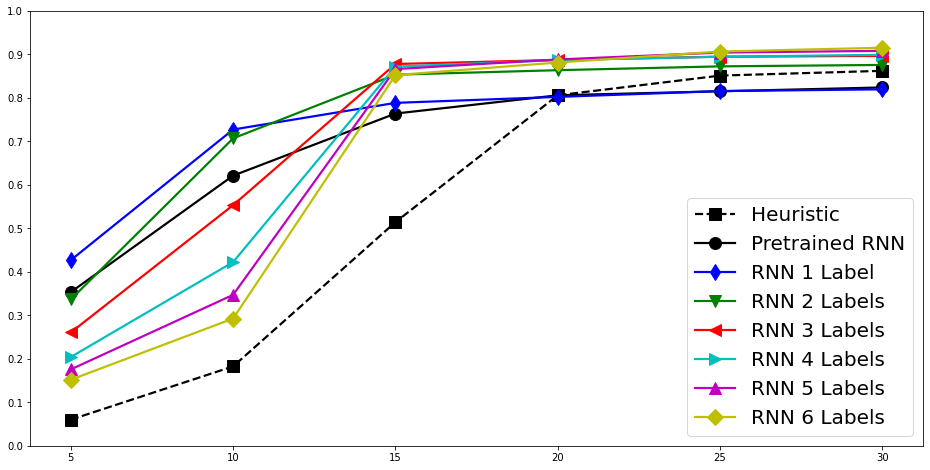

In [94]:
# Plot all

x = np.array([5,10,15,20,25,30])
markersize = 12
linewidth = 2.2

plt.figure(figsize=(16,8))
plt.plot(x, heuristic, 'ks--', markersize=markersize, linewidth=linewidth, label='Heuristic')
plt.plot(x, pretrained_rnn, 'ko-', markersize=markersize, linewidth=linewidth, label='Pretrained RNN')
plt.plot(x, rnn_005, 'bd-', markersize=markersize, linewidth=linewidth, label='RNN 1 Label')
plt.plot(x, rnn_010, 'gv-', markersize=markersize, linewidth=linewidth, label='RNN 2 Labels')
plt.plot(x, rnn_015, 'r<-', markersize=markersize, linewidth=linewidth, label='RNN 3 Labels')
plt.plot(x, rnn_020, 'c>-', markersize=markersize, linewidth=linewidth, label='RNN 4 Labels')
plt.plot(x, rnn_025, 'm^-', markersize=markersize, linewidth=linewidth, label='RNN 5 Labels')
plt.plot(x, rnn_030, 'yD-', markersize=markersize, linewidth=linewidth, label='RNN 6 Labels')
#plt.scatter(x, heuristic, marker='P')
#plt.scatter(x, pretrained_rnn, marker='o')
#plt.scatter(x, rnn_005, marker='d')
#plt.scatter(x, rnn_010, marker='v')
#plt.scatter(x, rnn_015, marker='<')
#plt.scatter(x, rnn_020, marker='>')
#plt.scatter(x, rnn_025, marker='^')
#plt.scatter(x, rnn_030, marker='D')
plt.xlabel('')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.legend(loc='lower right', prop={'size': 20})
plt.grid(axis='y')
plt.show()

In [114]:
'''audio = np.load('../../data/interim/Audio_TrainVal_44K.npy')
sf.write('../../data/interim/Audio_TrainVal_44K.wav', audio, 44100)

audio = np.load('../../data/interim/Audio_Test_44K.npy')
sf.write('../../data/interim/Audio_Test_44K.wav', audio, 44100)'''


'''cutoff = 5513
cutoff_samples = int(5513*44100)

ground_truth = (np.load('../../data/interim/Onsets_TrainVal_44K.npy')-1024)/44100
ground_truth = ground_truth[int(len(ground_truth)*0.8)+1:]
np.save('../../data/interim/Onsets_Val_44K_Processed.npy',ground_truth-cutoff)

audio = np.load('../../data/interim/Audio_TrainVal_44K.npy')[cutoff_samples:]
sf.write('../../data/interim/Audio_Val_44K.wav', audio, 44100)'''


'''ground_truth = np.load('../../data/interim/Classes_Test.npy')

hop_size_ms = 128/22050
factor = np.arange(len(ground_truth))*hop_size_ms
ground_truth = factor*ground_truth

j = np.where(ground_truth!=0)
ground_truth = ground_truth[j]

ground_truth = ground_truth[:ground_truth.argmax()]+(64/22050)
for s in range(len(ground_truth)-1):
    if ground_truth[s+1]<ground_truth[s]:
        print('ensuring monotonic ground_truth')
        ground_truth[s+1] = ground_truth[s]'''


'''audio_test = np.load('../../data/interim/Audio_Test_44K.npy')
plt.plot(audio_test[:100000])
for n in range(10):
    plt.axvline(x=ground_truth[n]*44100-1024)'''


'''x = np.array([5,10,15,20,25])

spl_1 = make_interp_spline(x, pretrained_rnn)
spl_2 = make_interp_spline(x, heuristic)
spl_3 = make_interp_spline(x, stateless_rnn)
spl_4 = make_interp_spline(x, stateful_rnn)

x_spl = np.linspace(x.min(), x.max(), 5)

pretrained_rnn_spl = spl_1(x_spl)
heuristic_spl = spl_2(x_spl)
stateless_rnn_spl = spl_3(x_spl)
stateful_rnn_spl = spl_4(x_spl)

plt.figure()
plt.plot(x_spl, heuristic_spl, label='Heuristic')
plt.plot(x_spl, pretrained_rnn_spl, label='Pretrained RNN')
plt.plot(x_spl, stateless_rnn_spl, label='Stateless RNN')
plt.plot(x_spl, stateful_rnn_spl, label='Stateful RNN')
plt.scatter(x, heuristic, marker='D')
plt.scatter(x, pretrained_rnn, marker='D')
plt.scatter(x, stateless_rnn, marker='D')
plt.scatter(x, stateful_rnn, marker='D')
plt.legend()
plt.show()'''

'''heuristic = np.array([0.0600572, 0.18255481, 0.51429933, 0.80600572, 0.85128694, 0.86224976])
#stateless_rnn = np.array([0.3836107554417414,0.7257030093734584,0.8345153664302599,0.8446647780925401,0.8573456352022713])
#stateful_rnn = np.array([0.7755757900374934,0.7947154471544716,0.8087741935483871,0.8147410358565738,0.8297435897435897])
pretrained_rnn = np.array([0.35959309, 0.62361013, 0.76318902, 0.80529927, 0.8133428,  0.82138633])
rnn_005 = np.array([0.43291676491393544,0.7082305449652387,0.7793427230046949,0.7945450480661748,0.8110887547507266,0.8146657724122512])
rnn_010 = np.array([0.34219958498396535,0.6868209730751063,0.8439971243709561,0.853032845840326,0.8638095238095237,0.8658420551855376])
rnn_015 = np.array([0.2647628267182962,0.555805857055089,0.8643700313177548,0.8744609487302348,0.8805151442880993,0.8817049808429118])
rnn_020 = np.array([0.20987311290173194,0.43035413153457,0.8609690771852933,0.878581835842642,0.8926060606060606,0.8955151515151515])
rnn_025 = np.array([0.17189651424016233,0.34739099356683345,0.8610074626865672,0.889897301170289,0.905705996131528,0.9083011583011582])
rnn_030 = np.array([0.14673814830431903,0.28856304985337244,0.8531403222040624,0.8789959744257636,0.9047734431790647,0.9112454655380895])'''